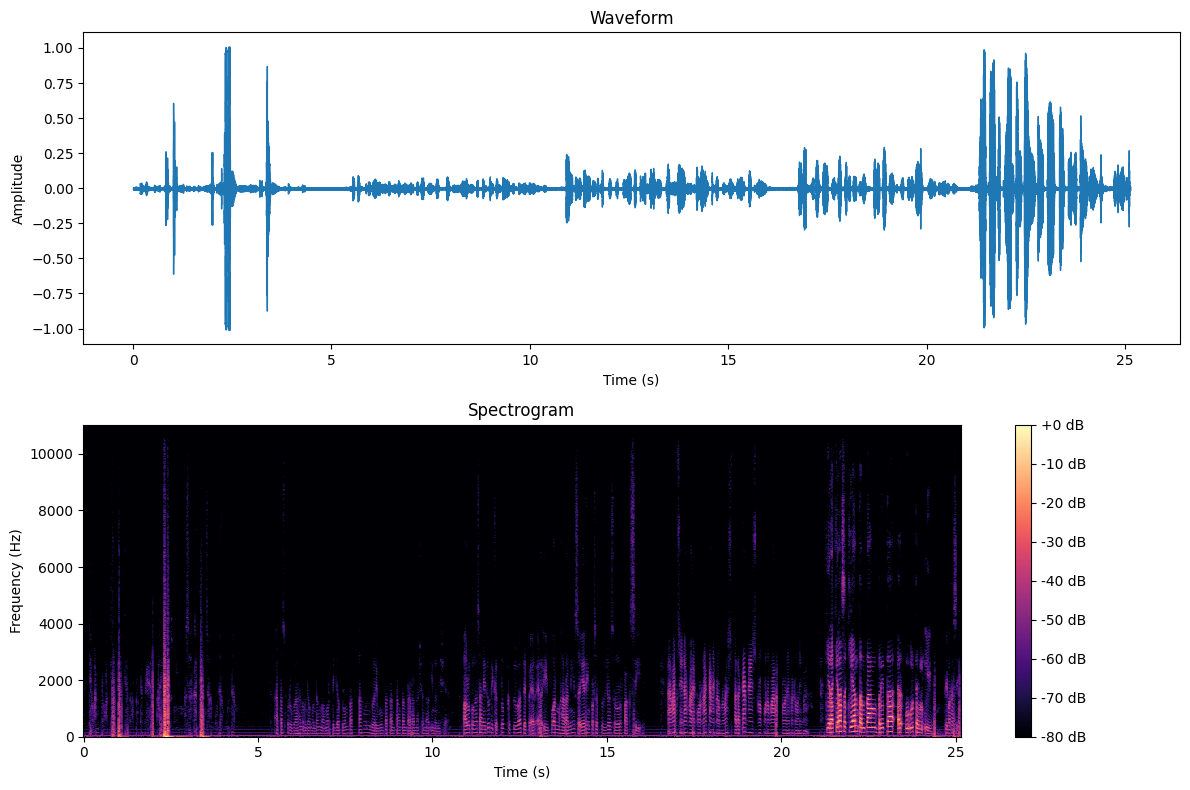

In [2]:
import librosa
import numpy as np
import librosa.display
import matplotlib.pyplot as plt

# Load the audio file
y, sr = librosa.load('file_suara/original.wav')

# Create a figure with two subplots
plt.figure(figsize=(12, 8))

# Plot waveform
plt.subplot(2, 1, 1)
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Plot spectrogram
plt.subplot(2, 1, 2)
D = librosa.amplitude_to_db(abs(librosa.stft(y)), ref=np.max)
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')

plt.tight_layout()
plt.show()